# Домашнее задание 9

Это домашнее задание по материалам 12го семинара. Дедлайн по отправке - 23:55 5 мая. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_9

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

In [637]:
import numpy as np
import math
import random
from tqdm.notebook import tqdm
from tqdm.notebook import trange
from matplotlib import pylab as plt
from sklearn.datasets import load_svmlight_file
from sklearn.metrics import accuracy_score

## Задача 1

Рассмотрим одномерную задачу минимизации:
\begin{equation}
\min_{x \in \mathbb{R}} f(x) = x \arctan x - \frac{1}{2} \log (1 + x^2).
\end{equation}

__(а)__ Реализуйте для этой задачи метод градиентного спуска и метод Ньютона. Нарисуйте графики сходимости данных методов для двух разных точек старта $x^0 = 1.3$ и $x^0 = 1.5$. Сделайте вывод. В общем случае для каких $x^0$ еще есть сходимость метода Ньютона, а для каких она пропадает? Почему?

Градиент функции:

$$\nabla f(x) = \arctan x$$

Гессиан функции:

$$\nabla^2 f(x) = \frac{1}{1 + x^2}$$

In [382]:
# Целевая функция
def f(x):
    return x * math.atan(x) - 1 / 2 * math.log(1 + x * x)

# Градиент функции
def grad_f(x):
    return math.atan(x)

# Гессиан функции
def hessian_f(x):
    return 1 / (1 + x * x)

In [947]:
x_0_1 = 1.3
x_0_2 = 1.5

In [948]:
def Newton(grad_f, hessian_f, x_0, gamma, iteration, x_sol=0, epsilon=10**-7):
    
    x = np.copy(x_0)
    errors = []
    
    errors.append(np.abs(x - x_sol))
    
    for k in trange(iteration, colour='green'):

        x = x - gamma(k) * grad_f(x) / hessian_f(x)
        
        errors.append(np.abs(x - x_sol))

        if errors[-1] < epsilon:
            break
            
    return x, errors

In [949]:
def gamma_true(k):
    return 1

In [950]:
_, errors_1 = Newton(grad_f, hessian_f, x_0_1, gamma_true, 5)
_, errors_2 = Newton(grad_f, hessian_f, x_0_2, gamma_true, 5)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

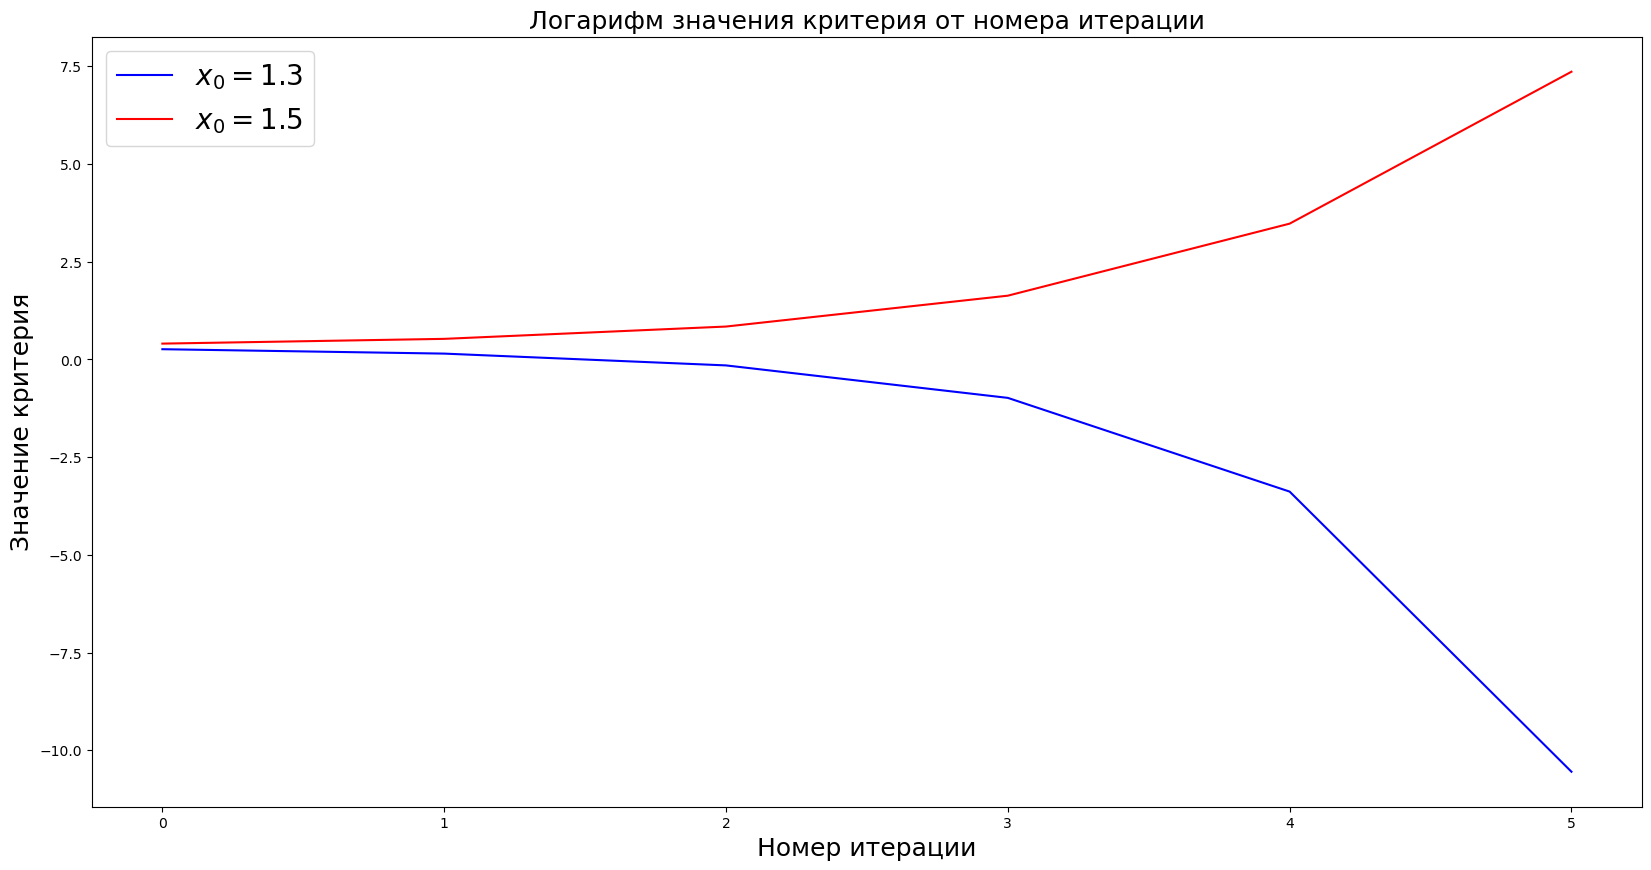

In [951]:
plt.figure(figsize = (20, 10))

plt.plot(np.array(range(len(errors_1))), np.log(errors_1), color = 'blue', label = r'$x_0 = 1.3$')
plt.plot(np.array(range(len(errors_2))), np.log(errors_2), color = 'red', label = r'$x_0 = 1.5$')

plt.title("Логарифм значения критерия от номера итерации", fontsize = 18)
plt.xlabel("Номер итерации", fontsize = 18)
plt.ylabel("Значение критерия", fontsize = 18)

plt.legend(fontsize = 20)
plt.show()

Как мы видим при $x_0 = 1.3$ метод сходится, а при $x_0 = 1.5$ не сходится.

Для нахождения радиуса сходимости воспользуемся теоремой с семинара:
    
$$| \nabla^2 f(x) - \nabla^2 f(y)| = \left| \frac{1}{1 + x^2} - \frac{1}{1 + y^2} \right| = \left| \frac{(x + y)(x - y)}{(1 + x^2)(1 + y^2)} \right| \leq \left| \frac{x + y}{(1 + x^2)(1 + y^2)} \right| |x - y| \leq \left| \frac{x + y}{(1 + x^2)(1 + y^2)} \right| |x - y| \leq \frac{3 \sqrt{3}}{8} |x - y|$$

То есть $M = \frac{3 \sqrt{3}}{8}$, а $L = 1$.

Тогда радиус гарантированной сходимости равен $\frac{16 \sqrt{3}}{27} \approx 1.026$. То есть для $x_0$, отличающихся больше, чем на эту величину, гарантированной сходимости нет.

__(б)__ Реализуйте две модификации метода Ньютона: демпфированный (добавление шага) и кубический метод Ньютона (смотри [статью](https://link.springer.com/article/10.1007/s10107-006-0706-8)). Решают ли эти методы проблему сходимости метода Ньютона для стартовой точки $x^0 = 1.5$? В демпфированном методе попробуйте разные стратегии подбора шага: увеличивающийся, Армихо и другие.

In [388]:
def Newton_Armiho(grad_f, hessian_f, x_0, iteration, x_sol=0, c=1 / 4, epsilon=10**-7):
    
    x = np.copy(x_0)
    errors = []
    
    errors.append(np.abs(x - x_sol))
    
    for k in trange(iteration, colour='green'):
        
        np.random.seed(k)
        alpha = random.uniform(0, 5)
        while f(x - alpha * grad_f(x) / hessian_f(x)) > f(x) - c * alpha * grad_f(x) / hessian_f(x) * grad_f(x):
            alpha /= 2
        
        x -= alpha * grad_f(x) / hessian_f(x)
        
        errors.append(np.abs(x - x_sol))

        if errors[-1] < epsilon:
            break
            
    return x, errors

Значение argmin можно найти в явном виде, но там получается неприятное выражение, которое надо исследовать. Поэтому я решил найти решение argmin приближенно. 

In [441]:
def f_argmin(x, y):
    return math.atan(x) + (y - x) / (1 + x * x) + 3 * np.sqrt(3) / 16 * (y - x) * np.abs(y - x)    

def Newton_cubic(grad_f, hessian_f, x_0, iteration, x_sol=0, epsilon=10**-7):
    
    x = np.copy(x_0)
    errors = []
    
    errors.append(np.abs(x - x_sol))
    
    for k in trange(iteration, colour='green'):        

        y_right = 10
        y_left = -10
        for i in range(30):
            
            y = (y_right + y_left) / 2
            
            if (f_argmin(x, y) > 0):
                y_right = y 
            elif (f_argmin(x, y) < 0):
                y_left = y
            else:
                break
        
        x = (y_right + y_left) / 2
        
        errors.append(np.abs(x - x_sol))

        if errors[-1] < epsilon:
            break
            
    return x, errors

In [442]:
def gamma_const(k):
    return 1 / 1.3

def gamma_increasing(k):
    return k / (k + 1)

In [443]:
_, errors_3 = Newton(grad_f, hessian_f, x_0_1, gamma_const, 10)
_, errors_4 = Newton(grad_f, hessian_f, x_0_2, gamma_const, 10)
_, errors_5 = Newton(grad_f, hessian_f, x_0_1, gamma_increasing, 10)
_, errors_6 = Newton(grad_f, hessian_f, x_0_2, gamma_increasing, 10)
_, errors_7 = Newton_Armiho(grad_f, hessian_f, x_0_1, 10)
_, errors_8 = Newton_Armiho(grad_f, hessian_f, x_0_2, 10)
_, errors_9 = Newton_cubic(grad_f, hessian_f, x_0_1, 10)
_, errors_10 = Newton_cubic(grad_f, hessian_f, x_0_2, 10)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

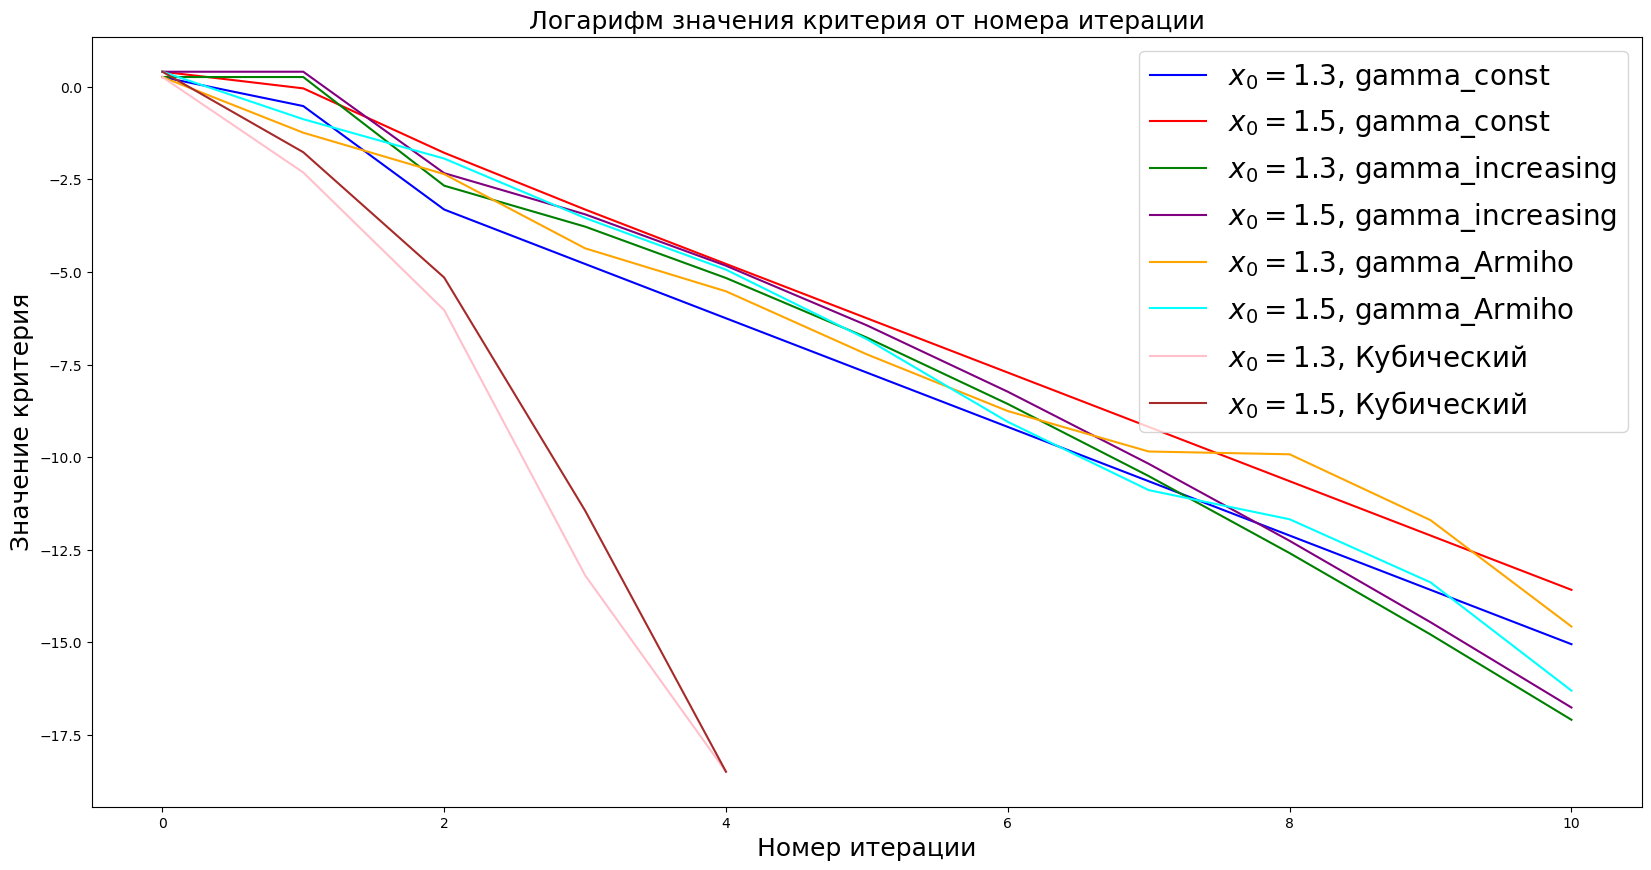

In [444]:
plt.figure(figsize = (20, 10))

plt.plot(np.array(range(len(errors_3))), np.log(errors_3), color = 'blue', label = r'$x_0 = 1.3$, gamma_const')
plt.plot(np.array(range(len(errors_4))), np.log(errors_4), color = 'red', label = r'$x_0 = 1.5$, gamma_const')
plt.plot(np.array(range(len(errors_5))), np.log(errors_5), color = 'green', label = r'$x_0 = 1.3$, gamma_increasing')
plt.plot(np.array(range(len(errors_6))), np.log(errors_6), color = 'purple', label = r'$x_0 = 1.5$, gamma_increasing')
plt.plot(np.array(range(len(errors_7))), np.log(errors_7), color = 'orange', label = r'$x_0 = 1.3$, gamma_Armiho')
plt.plot(np.array(range(len(errors_8))), np.log(errors_8), color = 'cyan', label = r'$x_0 = 1.5$, gamma_Armiho')
plt.plot(np.array(range(len(errors_9))), np.log(errors_9), color = 'pink', label = r'$x_0 = 1.3$, Кубический')
plt.plot(np.array(range(len(errors_10))), np.log(errors_10), color = 'brown', label = r'$x_0 = 1.5$, Кубический')

plt.title("Логарифм значения критерия от номера итерации", fontsize = 18)
plt.xlabel("Номер итерации", fontsize = 18)
plt.ylabel("Значение критерия", fontsize = 18)

plt.legend(fontsize = 20)
plt.show()

Как мы видим кубический метод Ньютона сходится лучше всего.

## Задача 2

Вернемся к задаче логистической регресии на датасете _mushrooms_. Добавьте к этой задаче $\ell_2$-регуляризатор с $\lambda = L/100$. 

__(а)__ Для данной задачи реализуйте метод Ньютона и метод градиентного спуска. Попробуйте комбинировать эти два метода, чтобы добиться хорошего решения задачи регрессии, но избежать расходимости метода Ньютона. Как это будете делать? Постройте график сходимости.

In [445]:
dataset = "mushrooms.txt"
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
n, d = X.shape
y = 2 * y - 3

In [446]:
seed = 4

np.random.seed(seed)
np.random.shuffle(X)
X_train = X[:(n*4) // 5]
X_test = X[(n*4) // 5:]

np.random.seed(seed)
np.random.shuffle(y)
y_train = y[:(n*4) // 5]
y_test = y[(n*4) // 5:]

In [447]:
maximum = -1
for line in X_train:
    norm = np.linalg.norm(line, ord = 2)**2    
    if norm > maximum:
        maximum = norm
L = maximum / 4
print("L =", round(L, 2))

L = 5.25


In [602]:
#Целевая функция
def f(w):
    s = 0
    for i in range(F.shape[0]):
        s += np.log(1 + np.exp(- w.T @ F[i] * a[i]))
    return 1 / F.shape[0] * s + L / 200 * w.T @ w

#Градиент функции 
def grad_f(w):
    s = np.zeros(w.size)
    for i in range(F.shape[0]):
        s += 1 / (1 + np.exp(w.T @ F[i] * a[i])) * a[i] * F[i]
    return - 1 / F.shape[0] * s + L / 100 * w

#Гессиан функции 
def hessian_f(w):
    s = np.zeros((w.size, w.size))
    for i in range(F.shape[0]):
        s += np.exp(w.T @ F[i] * a[i]) / (1 + np.exp(w.T @ F[i] * a[i]))**2 * np.outer(F[i], F[i])
    return 1 / F.shape[0] * s + L / 100 * np.eye(F.shape[1])

Будем сначала спускаться градиентным спуском, затем при достижении какой-то величины ошибки использовать метод Ньютона.

In [558]:
def Newton_GD(grad_f, hessian_f, x_0, gamma, epsilon_GD, iteration_Newton, epsilon_Newton=10**-7):
    
    x = np.copy(x_0)
    errors = []

    errors.append(np.linalg.norm(grad_f(x), ord = 2)**2)
    
    while errors[-1] > epsilon_GD:
        
        x -= gamma() * grad_f(x)
        errors.append(np.linalg.norm(grad_f(x), ord = 2)**2)
        
    for k in trange(iteration_Newton, colour='green'):
        
        x -= np.linalg.inv(hessian_f(x)) @ grad_f(x)
        
        errors.append(np.linalg.norm(grad_f(x), ord = 2)**2)

        if errors[-1] < epsilon_Newton:
            break
            
    return x, errors

In [559]:
F = X_train
a = y_train

np.random.seed(8)
w_0 = np.random.sample(d)

In [560]:
def gamma_GD():
    return 1 / L

In [571]:
_, errors_11 = Newton_GD(grad_f, hessian_f, w_0, gamma_GD, 10**-1, 10)
_, errors_12 = Newton_GD(grad_f, hessian_f, w_0, gamma_GD, 10**-3, 0)
_, errors_13 = Newton_GD(grad_f, hessian_f, w_0, gamma_GD, 10**1, 10)

  0%|          | 0/10 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

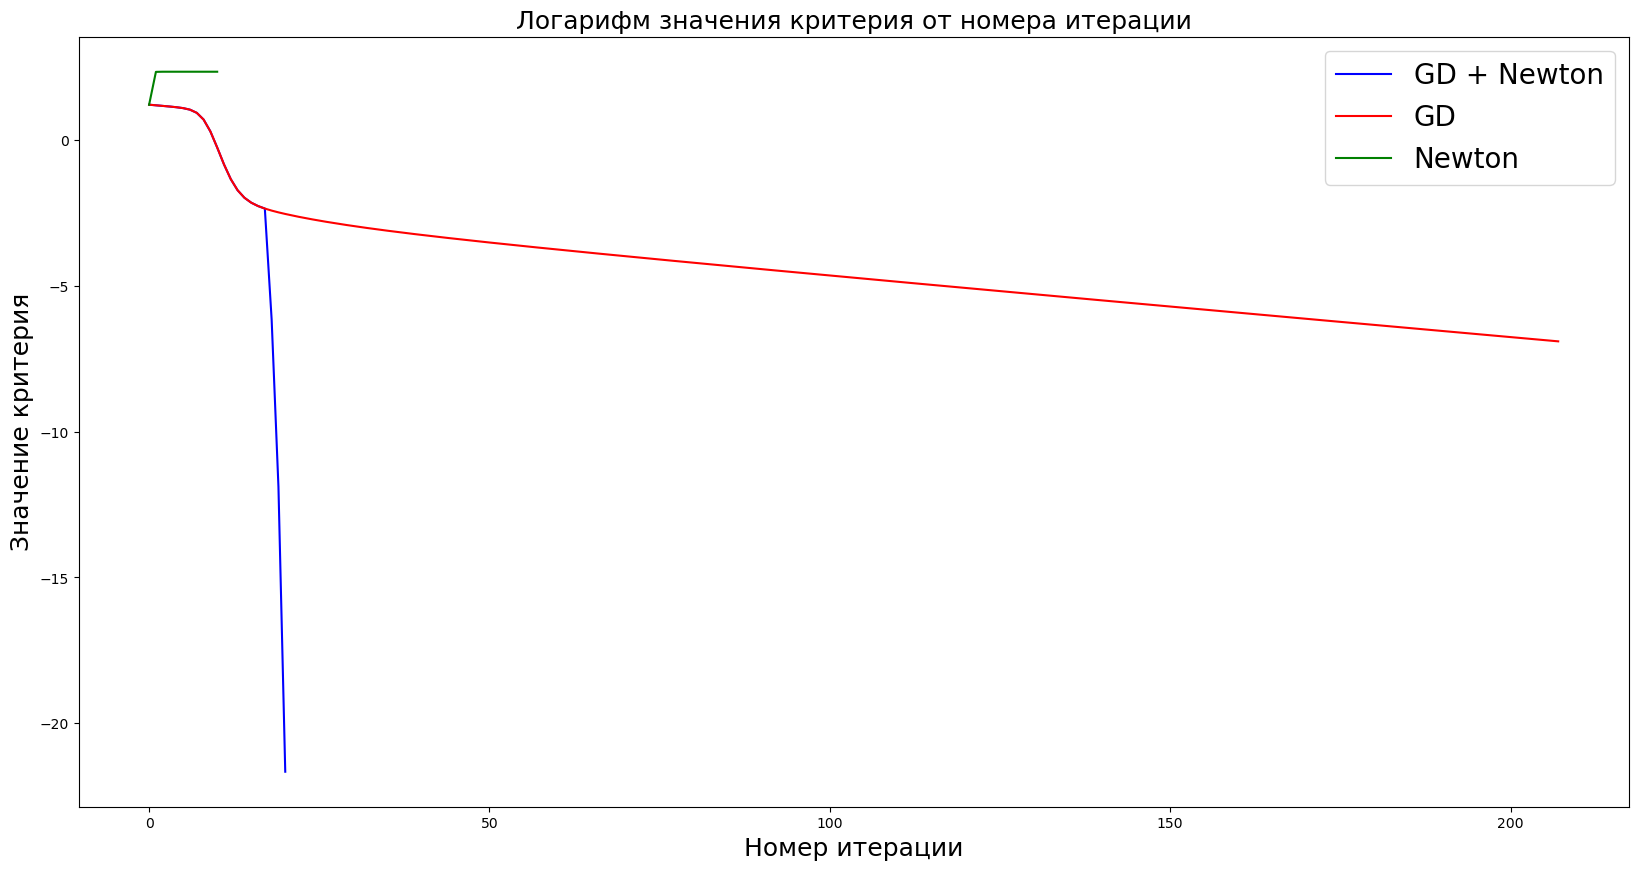

In [572]:
plt.figure(figsize = (20, 10))

plt.plot(np.array(range(len(errors_11))), np.log(errors_11), color = 'blue', label = 'GD + Newton')
plt.plot(np.array(range(len(errors_12))), np.log(errors_12), color = 'red', label = 'GD')
plt.plot(np.array(range(len(errors_13))), np.log(errors_13), color = 'green', label = 'Newton')

plt.title("Логарифм значения критерия от номера итерации", fontsize = 18)
plt.xlabel("Номер итерации", fontsize = 18)
plt.ylabel("Значение критерия", fontsize = 18)

plt.legend(fontsize = 20)
plt.show()

Как мы видим просто GD сходится очень долго, Newton не сходится, а вот их комбинация сходится хорошо.

__(б)__ Для данной задачи реализуйте квазиньютоновские методы: Бройдена, DFP, BFGS (смотри Главу 6 из [книги](https://www.csie.ntu.edu.tw/~r97002/temp/num_optimization.pdf), а особенности реализации можно посмотреть [здесь](https://github.com/scipy/scipy/blob/v0.18.1/scipy/optimize/optimize.py#L874-L976)), L-BFGS (смотри [статью](http://users.iems.northwestern.edu/~nocedal/PDFfiles/limited-memory.pdf)). Решите с помощью них задачу регресии. Постйроте графики сходимости и изменения accuracy. Сделайте вывод.

In [850]:
def Broyden(grad_f, hessian_f, x_0, gamma, iteration, m=None, epsilon=10**-7):
    
    x_now = np.copy(x_0)
    H = hessian_f(x_now)
    errors = []

    errors.append(np.linalg.norm(grad_f(x_now), ord = 2)**2)
    
    for k in trange(iteration, colour='green'):
        
        grad_now = grad_f(x_now)
        d = - H @ grad_now
        x_next = x_now + gamma(k) * d
        grad_next = grad_f(x_next)
        s = x_next - x_now
        y = grad_next - grad_now
        q = s - H @ y
        H = H + np.outer(q, q) / (q @ y)
        x_now = x_next
        
        errors.append(np.linalg.norm(grad_f(x_now), ord = 2)**2)

        if errors[-1] < epsilon:
            break
            
    return x_now, errors

In [872]:
def DFP(grad_f, hessian_f, x_0, gamma, iteration, m=None, epsilon=10**-7):
    
    x_now = np.copy(x_0)
    H = hessian_f(x_now)
    errors = []

    errors.append(np.linalg.norm(grad_f(x_now), ord = 2)**2)
    
    for k in trange(iteration, colour='green'):
        
        grad_now = grad_f(x_now)
        d = - H @ grad_now
        x_next = x_now + gamma(k) * d
        grad_next = grad_f(x_next)
        s = np.array([x_next - x_now]).T
        y = np.array([grad_next - grad_now]).T
        H = H - (H @ y @ y.T @ H) / (y.T @ H @ y) + s @ s.T / (y.T @ s)
        x_now = x_next
        
        errors.append(np.linalg.norm(grad_f(x_now), ord = 2)**2)

        if errors[-1] < epsilon:
            break
            
    return x_now, errors

In [873]:
def BFGS(grad_f, hessian_f, x_0, gamma, iteration, m=None, epsilon=10**-7):
    
    x_now = np.copy(x_0)
    H = hessian_f(x_now)
    errors = []

    errors.append(np.linalg.norm(grad_f(x_now), ord = 2)**2)
    
    for k in trange(iteration, colour='green'):
        
        grad_now = grad_f(x_now)
        d = - H @ grad_now
        x_next = x_now + gamma(k) * d
        grad_next = grad_f(x_next)
        s = np.array([x_next - x_now]).T
        y = np.array([grad_next - grad_now]).T
        V = np.eye(len(x_now)) - y @ s.T / (y.T @ s)
        H = V.T @ H @ V + s @ s.T / (y.T @ s)
        x_now = x_next
        
        errors.append(np.linalg.norm(grad_f(x_now), ord = 2)**2)

        if errors[-1] < epsilon:
            break
            
    return x_now, errors

In [874]:
def L_BFGS(grad_f, hessian_f, x_0, gamma, iteration, m=2, epsilon=10**-7):
    
    x_now = np.copy(x_0)
    H_0 = hessian_f(x_now)
    H = H_0
    s_s = np.zeros((len(x_now), m))
    y_s = np.zeros((len(x_now), m))
    errors = []

    errors.append(np.linalg.norm(grad_f(x_now), ord = 2)**2)
    
    for k in trange(iteration, colour='green'):
        
        grad_now = grad_f(x_now)
        d = - H @ grad_now
        x_next = x_now + gamma(k) * d
        grad_next = grad_f(x_next)
        s = x_next - x_now
        y = grad_next - grad_now
        
        for i in range(m - 1):
            s_s[:, i] = s_s[:, i + 1]
            y_s[:, i] = y_s[:, i + 1]
        s_s[:, m - 1] = s
        y_s[:, m - 1] = y
        
        H = H_0
        for i in range(max(0, m - k - 1), m):
            s = np.array([s_s[:, i]]).T
            y = np.array([y_s[:, i]]).T
        V = np.eye(len(x_now)) - y @ s.T / (y.T @ s)
        H = V.T @ H @ V + s @ s.T / (y.T @ s)
        x_now = x_next
        
        errors.append(np.linalg.norm(grad_f(x_now), ord = 2)**2)

        if errors[-1] < epsilon:
            break
            
    return x_now, errors

In [877]:
def gamma_Broyden(k):
    return 0.2

def gamma_DFP(k):
    return 0.2

def gamma_BFGS(k):
    return 0.2

def gamma_L_BFGS(k):
    return 0.2

In [878]:
_, errors_14 = Broyden(grad_f, hessian_f, w_0, gamma_Broyden, 100)
_, errors_15 = DFP(grad_f, hessian_f, w_0, gamma_DFP, 100)
_, errors_16 = BFGS(grad_f, hessian_f, w_0, gamma_BFGS, 100)
_, errors_17 = L_BFGS(grad_f, hessian_f, w_0, gamma_L_BFGS, 100, m=2)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

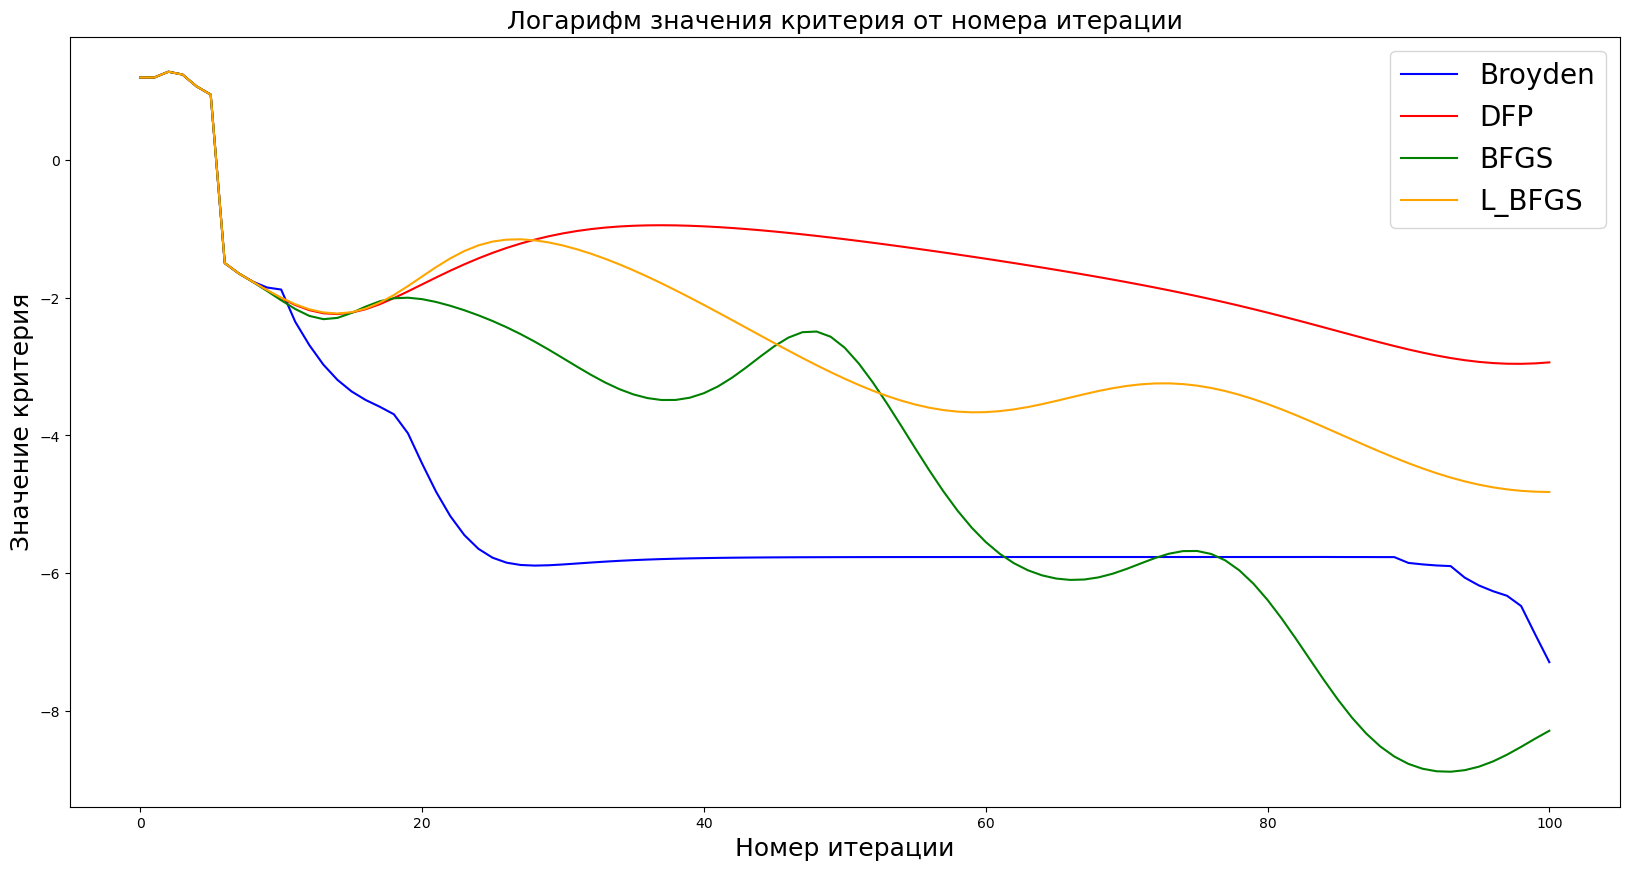

In [879]:
plt.figure(figsize = (20, 10))

plt.plot(np.array(range(len(errors_14))), np.log(errors_14), color = 'blue', label = 'Broyden')
plt.plot(np.array(range(len(errors_15))), np.log(errors_15), color = 'red', label = 'DFP')
plt.plot(np.array(range(len(errors_16))), np.log(errors_16), color = 'green', label = 'BFGS')
plt.plot(np.array(range(len(errors_17))), np.log(errors_17), color = 'orange', label = 'L_BFGS')

plt.title("Логарифм значения критерия от номера итерации", fontsize = 18)
plt.xlabel("Номер итерации", fontsize = 18)
plt.ylabel("Значение критерия", fontsize = 18)

plt.legend(fontsize = 20)
plt.show()

In [880]:
def accuracy(y_test, X_test, method, grad_f, hessian_f, x_0, gamma, iteration, step, m=None):
    accuracy = []
    for i in tqdm(range(1, iteration + 2, step), colour='green'):
        w, _ = method(grad_f, hessian_f, x_0, gamma, i, m)
        y_pred = X_test @ w
        for i in range(len(y_pred)):
            if y_pred[i] > 0:
                y_pred[i] = 1
            else:
                y_pred[i] = -1
        accuracy.append(accuracy_score(y_test, y_pred))
    return accuracy

In [881]:
accuracy_1 = accuracy(y_test, X_test, Broyden, grad_f, hessian_f, w_0, gamma_Broyden, 100, 10)
accuracy_2 = accuracy(y_test, X_test, DFP, grad_f, hessian_f, w_0, gamma_DFP, 100, 10)
accuracy_3 = accuracy(y_test, X_test, BFGS, grad_f, hessian_f, w_0, gamma_BFGS, 100, 10)
accuracy_4 = accuracy(y_test, X_test, L_BFGS, grad_f, hessian_f, w_0, gamma_L_BFGS, 100, 10, 2)

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

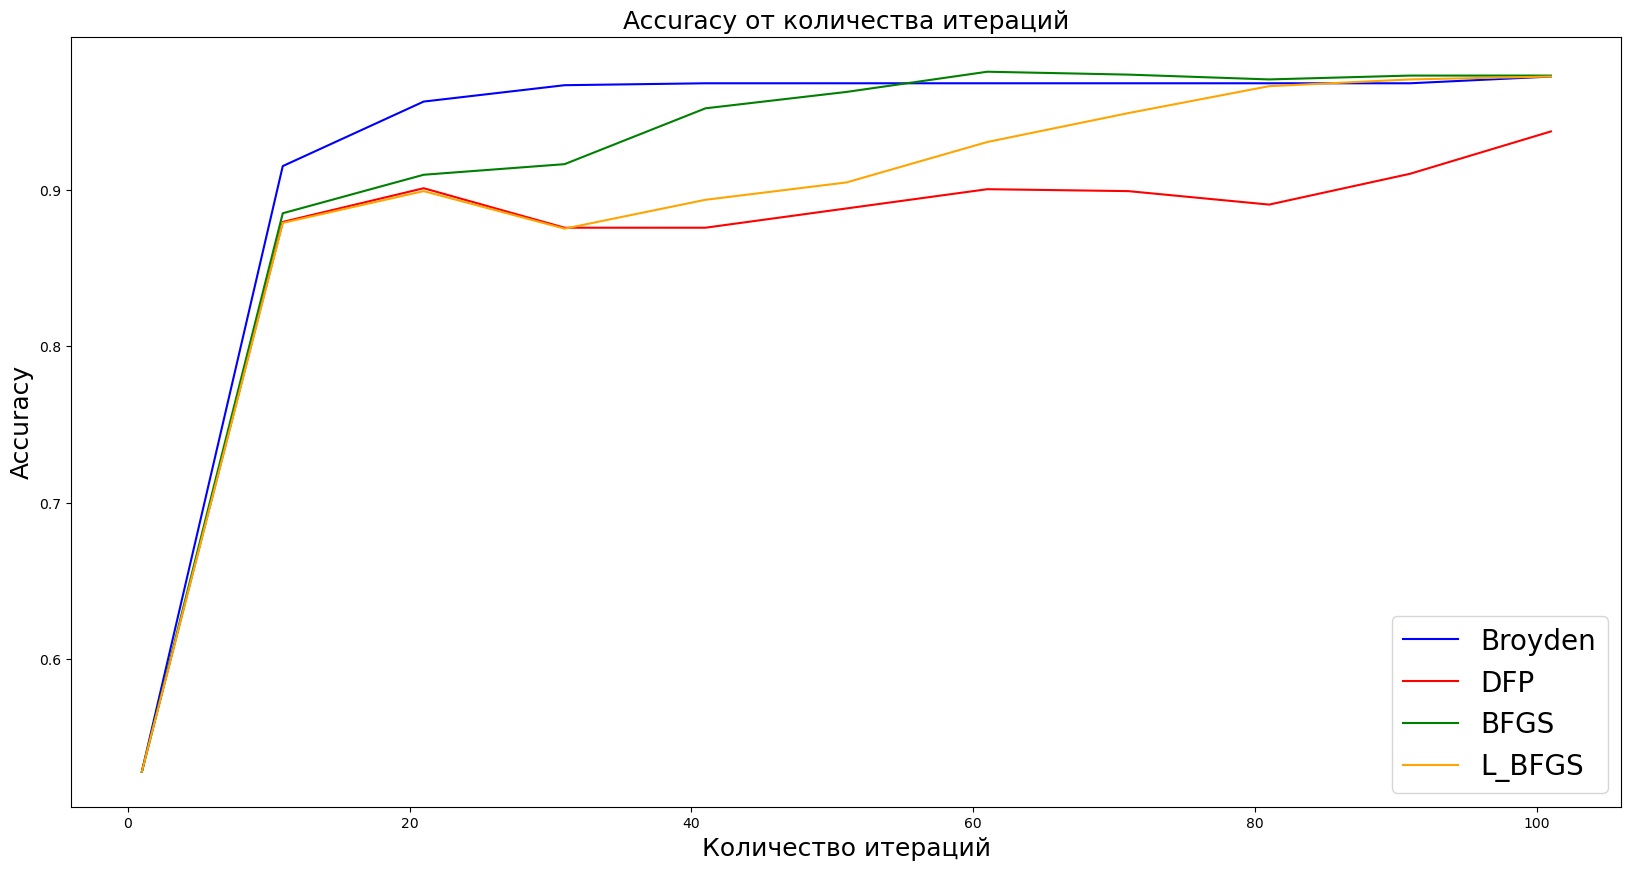

In [882]:
plt.figure(figsize = (20, 10))
plt.plot(np.array(range(1, 102, 10)), accuracy_1, color = 'blue', label = 'Broyden')
plt.plot(np.array(range(1, 102, 10)), accuracy_2, color = 'red', label = 'DFP')
plt.plot(np.array(range(1, 102, 10)), accuracy_3, color = 'green', label = 'BFGS')
plt.plot(np.array(range(1, 102, 10)), accuracy_4, color = 'orange', label = 'L_BFGS')
plt.title("Accuracy от количества итераций", fontsize = 18)
plt.xlabel("Количество итераций", fontsize = 18)
plt.ylabel("Accuracy", fontsize = 18)
plt.legend(fontsize = 20)
plt.show()

На данной задаче лучше всего сходится метод Broyden, при этом точность тоже наилучшая.

__Бонусные пункты__

__(в)__ Реализуйте подход из [работы](https://pages.cs.wisc.edu/~swright/726/handouts/barzilai-borwein.pdf). С помощью них решите задачу регресии. Сравните их работу с квазиньютоновскими методами. Сделайте вывод.

In [ ]:
#ответ

__(г)__ Реализуйте методы Newton-Learn и Cubic-Newton-Learn из [работы](https://proceedings.mlr.press/v139/islamov21a.html). С помощью них решите задачу регресии. Сравните их работу с квазиньютоновскими методами. Какой критерий сравнения будете использовать? 

In [ ]:
#ответ